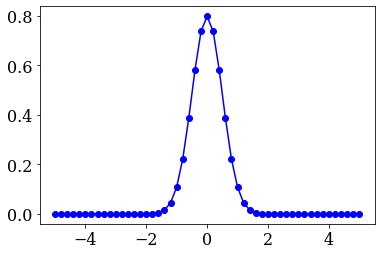

In [1]:
%matplotlib inline
import pylab, socket
import numpy as np
import matplotlib.pyplot as plt

from tikzplotlib import save as tikz_save
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16
import  matplotlib.animation  as  animation
a,b=-5,5# size  of  box
N = 51#  number  of  subdivisions
x=np.linspace(a,b,N)# positions  of  subdivisions
h=x[1]-x[0]# discretisation  stepsize  in x-direction

def  total(u):
    #""" Computes  total  number  of  moles  in u."""
    return  ((b-a)/ float(N)*np.sum(u))

def  gaussdistr(mean ,sigma ,x):
    #""" Return  gauss  distribution  for  given  numpy  array x"""return  1./( sigma*np.sqrt (2*np.pi))*np.exp(-0.5*(x-mean )**2/ sigma **2)#starting  configuration  for u(x,t0)
    return  1./( sigma*np.sqrt (2*np.pi))*np.exp(-0.5*(x-mean )**2/ sigma **2)
u = gaussdistr(mean=0.,sigma =0.5,x=x)

def  compute_g( u, D, h ):
    #""" given  a u(x,t) in  array ,  compute  g(x,t)=D*d^2u/dx^2using  central  differences  with  spacing h,and  return  g(x,t).  """
    d2u_dx2 = np.zeros(u.shape ,np.float)
    for i in  range(1,len(u)-1):
        d2u_dx2[i] = (u[i+1] - 2*u[i]+u[i-1])/h**2#special  cases  at  boundary:  assume  Neuman  boundary
        #conditions , i.e. no  change  of u over  boundary
        #so  that u[0]-u[ -1]=0  and  thus u[ -1]=u[0]
        i=0
        d2u_dx2[i] = (u[i+1] - 2*u[i]+u[i])/h**2#same  at  other  end  so  that u[N-1]-u[N]=0
        #and  thus u[N]=u[N -1]
        i=len(u)-1
        d2u_dx2[i] = (u[i] - 2*u[i]+u[i-1])/h**2
    return D*d2u_dx2
def  advance_time( u, g, dt):
    #""" Given  the  array u, the  rate  of  change  array g,and a  timestep  dt ,  compute  the  solution  for uafter t,  using  simple  Euler  method."""
    u = u +dt*g
    return u
#show  example , quick  and  dirtly , lots  of  global  variables
dt = 0.01#step  size  or time
stepsbeforeupdatinggraph = 20#plotting  is  slow
D = 1.#Diffusion  coefficient
stepsdone = 0#keep  track  of  iterations
def  do_steps(j,nsteps=stepsbeforeupdatinggraph ):
    #""" Function  called  by  FuncAnimation  class.  Computesnsteps  iterations , i.e.  carries  forward  solution  fromu(x,t_i) to u(x,t_{i+nsteps })."""
    global u,stepsdone
    for i in  range(nsteps ):
        g = compute_g( u, D, h)
        u = advance_time( u, g, dt)
        stepsdone  += 1
        time_passed = stepsdone * dt
    print("stepsdone =%5d, time =%8gs , total(u)=%8g" %(stepsdone ,time_passed ,total(u)))
    l.set_ydata(u)#  update  data  in  plot
    fig1.canvas.draw()#  redraw  the  canvas
    return l,
fig1 = plt.figure ()#setup  animation
l,= plt.plot(x,u,'b-o')
#plot  initial  u(x,t)#then  compute  solution  and  animate
line_ani = animation.FuncAnimation(fig1 ,do_steps , range (10000))
plt.show()

In [2]:
# initialization function: plot the background of each frame
def init0():
    line0.set_data([], [])
    #line1.set_data([], [])
    return (line0,)#line1,)

# animation function. This is called sequentially
def animate0(i,salidai):
    xs,fp = salidai[i][2:]
    line0.set_data(xs, fp(xs))
    return (line0,)

# función armónica en la superficie
def Dirichlet_armonica(T0,Ta,t,x,omega,alpha=1e-6):

    T = T0 + Ta * np.exp(-x*np.sqrt(np.pi*omega/(alpha))) * np.sin((2.*np.pi*omega*t)-x*np.sqrt(np.pi*omega/(alpha)))
    return T

### DATOS			
Coeficiente de convección externa	he	25	W/m² K
Coeficiente de convección interna	hi	8,33	W/m² K
Conductividad del revoque	kr	1	W/m K
Espesor del revoque	er	0,015	m
Densidad del revoque	ρr	1900	kg/m³
Calor específico del revoque	Cr	800	J/kg K
Conductividad del ladrillo	kl	0,91	W/m K
Espesor del ladrillo	el	0,12	m
Densidad del ladrillo	ρl	1800	kg/m³
Calor específico del ladrillo	Cl	800	J/kg K
Temperatura exterior	Te	35	°C
Temperatura interior	Ti	24	°C
Variación térmica diaria	ΔT 	11	°C
			
Espesor de la pared:	e	0,15	m
Resistencia térmica de la pared	R	0,162	m² K/W
Conductividad de la pared	k	0,927	W/m K
Masa de la pared	M	1820	kg/m³
Calor específico de la pared	C	800	J/kg K
Difusividad térmica de la pared	α	6,36E-07	m2/s
Coeficiente global de transmisión	U	3,11	W/m² K

In [3]:
he,hi,k_r,e_r,rho_r,C_r,k_l,e_l,rho_l,C_l = [25,8.33,1,0.015,1900,800,0.91,0.12,1800,800]
Te,Ti,deltaT = [35,24,11]
e_p,R_p,k_p,rho_p,C_p,a_p,U_g = [0.15,0.162,0.927,1820,800,6.36e-7,3.11]


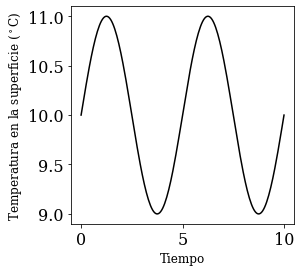

In [4]:
# Constantes y parámetros
T0 = 10.                      # temperatura media
Ta = 1.                       # amplitud de la variación de temperatura
ts = np.linspace(0,1e1,200)   # tiempo
xs = np.arange(0,40e-3,1e-4)  # distancias
omega = 0.2                   # frecuencia (2 pi freq)
alpha_l = 1.5e-5              #difusividad térmica del latón
n_profiles = 5                # número de perfiles a plotear

#########################################################################################


fig1,ax1 = plt.subplots(1)
# Graficamos la condición de borde
fig1.set_size_inches((4,4))
#plt.title(r'Condición de borde')
ax1.plot(ts,T0+Ta*np.sin(2.*np.pi*omega*ts),'k');
ax1.set_ylabel('Temperatura en la superficie ($^\circ$C)',fontsize=12)
ax1.set_xlabel('Tiempo',fontsize=12);
#plt.tight_layout()
  

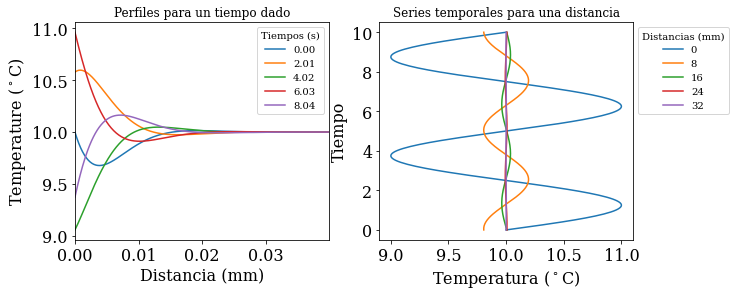

In [5]:
fig2,ax2 = plt.subplots(1,2,figsize=(10,4));
# Genera un loop para realizar los n perfiles
for t in ts[::len(ts)//n_profiles]:
    # evalúa la función
    T = Dirichlet_armonica(T0,Ta,t,xs,omega,alpha_l)
    # Plot
    ax2[0].plot(xs,T,label='%.2f'%(t))
    
ax2[0].legend(title='Tiempos (s)')
ax2[0].set_xlabel('Distancia (mm)');
ax2[0].set_ylabel('Temperature ($^\circ$C)');
ax2[0].set_xlim([min(xs),max(xs)]);
ax2[0].set_title('Perfiles para un tiempo dado')


# Gráfico de las series temporales

for x in xs[::len(xs)//n_profiles]:
    T = Dirichlet_armonica(T0,Ta,ts,x,omega,alpha_l)
    # Plot
    ax2[1].plot(T,ts,label='%0d'%(x*1000))
    
ax2[1].legend(title='Distancias (mm)',bbox_to_anchor=(1, 1))
ax2[1].set_xlabel('Temperatura ($^\circ$C)');
ax2[1].set_ylabel('Tiempo');
ax2[1].set_title('Series temporales para una distancia');


NameError: name 'salida_xy' is not defined

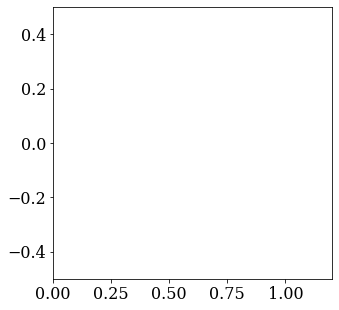

In [6]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
for axi in (ax,):
    axi.set_xlim([0, 1.2])
    axi.set_ylim([-.5,.5])
line0, = ax.plot([], [], lw=2)

anim0 = animation.FuncAnimation(fig, animate0, init_func=init0, fargs=[salida_xy],
                               frames=24, interval=200, blit=True)


In [ ]:
HTML(anim0.to_html5_video())


